<font size="10" color="purple"><left><b><i><u>Exploratory Data Analysis #1</u></i></b></left></font>

<font size="4"><li><left><i>Instanciamos clase EDA con los métodos necesarios</i></left></font>


In [136]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
#import pandas_profiling as pdpf
from IPython.display import HTML
#import sweetviz as sv

class EDA:
    def read_csv(self, file_path):
        """
        Lee un archivo CSV y devuelve un dataframe.

        Args:
            file_path (str): Ruta al archivo CSV a leer.

        Returns:
            pd.DataFrame: El dataframe con los datos del archivo CSV.
        """
        dataframe = pd.read_csv(file_path,encoding='UTF-8')
        return dataframe

    def get_columnas(self, dataframe):
        """
        Obtiene una lista de las columnas de un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe del cual se desean obtener las columnas.

        Returns:
            list: Lista de las columnas del dataframe.
        """
        columnas = dataframe.columns.tolist()
        return columnas

    def set_columns_dtype_category(self, dataframe, columnas):
        """
        Asigna el tipo de dato "category" a una lista de columnas en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "category".
        """
        dataframe[columnas] = dataframe[columnas].astype('category')

    def set_columns_dtype_int(self, dataframe, columnas):
        """
        Asigna el tipo de dato "int" a una lista de columnas en un dataframe.
        Los valores nulos en las columnas seleccionadas se reemplazan por 0.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "int".
        """
        dataframe[columnas] = dataframe[columnas].astype(int).fillna(0)

    def set_columns_dtype_float(self, dataframe, columnas):
        """
        Asigna el tipo de dato "float" a una lista de columnas en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "float".
        """
        dataframe[columnas] = dataframe[columnas].astype(float)

    def set_columns_dtype_datetime(self, dataframe, columnas, formato='%Y-%m-%d'):
        """
        Asigna el tipo de dato "datetime" a una lista de columnas en un dataframe, con el formato especificado.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea asignar los tipos de dato.
            columnas (list): La lista de columnas a las que se desea asignar el tipo de dato "datetime".
            formato (str): El formato de fecha a utilizar (por defecto: "%Y-%m-%d").
        """
        dataframe[columnas] = pd.to_datetime(dataframe[columnas], format=formato)

    def rename_columns(self, dataframe, column_mapping):
        """
        Modifica los nombres de las columnas de un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se le van a modificar los nombres de las columnas.
            column_mapping (dict): Un diccionario que contiene el mapeo de los nombres actuales de las columnas a los nuevos nombres.

        Returns:
            pd.DataFrame: El dataframe con los nombres de columnas modificados.
        """
        dataframe.rename(columns=column_mapping, inplace=True)
        return dataframe

    def get_duplicate_rows(self, dataframe, column):
        """
        Devuelve las filas del dataframe que tienen valores repetidos en una columna específica,
        junto con la cantidad de repeticiones y el porcentaje respecto al total de líneas.

        Args:
            dataframe (pd.DataFrame): El dataframe a analizar.
            column (str): El nombre de la columna en la cual buscar repeticiones.

        Returns:
            pd.DataFrame: Un dataframe con las filas que se repiten, la cantidad de repeticiones
                        y el porcentaje respecto al total de líneas.
        """
        duplicated_rows = dataframe[dataframe.duplicated(subset=column, keep=False)]
        duplicated_counts = duplicated_rows[column].value_counts().reset_index()
        duplicated_counts.columns = [column, 'Cantidad']
        duplicated_counts['Porcentaje'] = duplicated_counts['Cantidad'] / len(dataframe) * 100
        return duplicated_counts
    
    def get_duplicate_rows_2(self, dataframe, column):
        """
        Devuelve las filas del dataframe que tienen valores repetidos en una columna específica.
        Incluye las otras columnas del dataframe, la cantidad y el porcentaje de filas duplicadas.
        Ordena el resultado por los valores de la columna especificada.

        Args:
            dataframe (pd.DataFrame): El dataframe a analizar.
            column (str): El nombre de la columna en la que se buscarán valores duplicados.

        Returns:
            pd.DataFrame: El dataframe con las filas duplicadas, incluyendo las otras columnas,
                        la cantidad y el porcentaje de filas duplicadas. Ordenado por la columna especificada.
        """
        duplicates = dataframe[dataframe.duplicated(subset=column, keep=False)]
        duplicate_counts = duplicates[column].value_counts()
        duplicate_percentages = duplicate_counts / len(dataframe) * 100

        duplicates['Duplicate Count'] = duplicates[column].map(duplicate_counts)
        duplicates['Duplicate Percentage'] = duplicates[column].map(duplicate_percentages)

        duplicates = duplicates.sort_values(by=column)

        return duplicates

    def strip_column_values(self, dataframe, column_names):
        """
        Elimina los espacios en blanco al inicio y al final de los valores de las filas de las columnas especificadas.

        Args:
            dataframe (pd.DataFrame): El dataframe en el cual se van a limpiar los valores de las columnas.
            column_names (list): Una lista de nombres de columnas a las cuales se les va a aplicar el método .strip().

        Returns:
            pd.DataFrame: El dataframe con los valores de las filas de las columnas especificadas limpios de espacios en blanco.
        """
        for column in column_names:
            dataframe[column] = dataframe[column].str.strip()
        return dataframe

    def sort_dataframe(self, dataframe, column, order='a'):
        """
        Ordena un dataframe por una columna especificada.

        Args:
            dataframe (pd.DataFrame): El dataframe a ordenar.
            column (str): El nombre de la columna por la cual ordenar el dataframe.
            order (str, opcional): El orden de clasificación. 'a' para ascendente (predeterminado),
                'd' para descendente.

        Returns:
            pd.DataFrame: El dataframe ordenado por la columna especificada.
        """
        if order == 'd':
            dataframe = dataframe.sort_values(column, ascending=False)
        else:
            dataframe = dataframe.sort_values(column)

        return dataframe

    def sort_and_replace(self, dataframe, column1, column2):
        """
        Ordena un dataframe de menor a mayor según los valores de una columna y reemplaza los valores de otra columna por enteros.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            column1 (str): El nombre de la primera columna según la cual se va a ordenar el dataframe.
            column2 (str): El nombre de la segunda columna cuyos valores se reemplazarán por enteros.

        Returns:
            pd.DataFrame: El dataframe ordenado y con los valores de la segunda columna reemplazados por enteros.
        """
        # Ordenar dataframe por la columna 1 de menor a mayor
        dataframe = dataframe.sort_values(by=column1)

        # Reemplazar los valores de la columna 2 por enteros
        dataframe[column2] = range(len(dataframe))

        return dataframe
        
    def convert_date_format(self, dataframe, columns):
        """
        Convierte el formato de fecha de columnas en un dataframe de 'MMM DD, YYYY' a 'YYYY-MM-DD'
        y asigna el dtype datetime a las columnas especificadas.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            columns (list): Una lista de nombres de columnas a convertir y asignar el dtype datetime.

        Returns:
            pd.DataFrame: El dataframe con los formatos de fecha modificados y dtype datetime asignado.
        """
        for column in columns:
            dataframe[column] = pd.to_datetime(dataframe[column], format='%b %d, %Y').dt.strftime('%Y-%m-%d')
            dataframe[column] = pd.to_datetime(dataframe[column])
            
        return dataframe

    def remove_prefix(self, dataframe, column, prefix):
        """
        Elimina un prefijo de las filas de una columna en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe a procesar.
            column (str): El nombre de la columna en la que se eliminará el prefijo.
            prefix (str): El prefijo a eliminar de las filas de la columna.

        Returns:
            pd.DataFrame: El dataframe con el prefijo eliminado de las filas de la columna especificada.
        """
        dataframe[column] = dataframe[column].str.lstrip(prefix)
        return dataframe
    
    def transform_values(self, dataframe, columns, symbols):
        """
        Transforma los valores de las columnas especificadas en el dataframe, eliminando símbolos, realizando un strip y convirtiendo a minúscula.

        Args:
            dataframe (pd.DataFrame): El dataframe a transformar.
            columns (list): La lista de nombres de columnas a transformar.
            symbols (list): La lista de símbolos a eliminar.

        Returns:
            pd.DataFrame: El dataframe con los valores transformados.
        """
        for column in columns:
            for symbol in symbols:
                dataframe[column] = dataframe[column].str.replace(symbol, '')
            dataframe[column] = dataframe[column].str.strip().str.lower()

        return dataframe

    def replace_na_values_obj(self, dataframe, columns, replacement):
        """
        Reemplaza los valores NaN en las columnas especificadas del dataframe con un valor de reemplazo.

        Args:
            dataframe (pd.DataFrame): El dataframe en el que se reemplazarán los valores NaN.
            columns (list): La lista de nombres de columnas en las que se realizará el reemplazo.
            replacement (str): El valor de reemplazo para los valores NaN.

        Returns:
            pd.DataFrame: El dataframe con los valores NaN reemplazados.
        """
        dataframe[columns] = dataframe[columns].fillna(replacement)
        return dataframe

    def convert_values_to_int(self,dataframe, columns, str_to_remove):
        """
        Convierte los valores de las columnas seleccionadas del dataframe en enteros.

        Los valores de las columnas seleccionadas que contengan el str indicado se eliminan.
        Los valores restantes se convierten a enteros.

        Args:
            dataframe (pd.DataFrame): El dataframe original.
            columns (list): Lista de nombres de columnas a modificar.
            str_to_remove (str): El str a eliminar de los valores de las columnas.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a enteros.
        """
        for column in columns:
            dataframe[column] = dataframe[column].str.replace(str_to_remove, '')
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').astype(pd.Int64Dtype())

        return dataframe

    def convert_values_to_float(self,dataframe, columns, str_to_remove):
        """
        Convierte los valores de las columnas seleccionadas del dataframe en flotantes.

        Los valores de las columnas seleccionadas que contengan el str indicado se eliminan.
        Los valores restantes se convierten a flotantes.

        Args:
            dataframe (pd.DataFrame): El dataframe original.
            columns (list): Lista de nombres de columnas a modificar.
            str_to_remove (str): El str a eliminar de los valores de las columnas.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a flotantes.
        """
        for column in columns:
            dataframe[column] = dataframe[column].str.replace(str_to_remove, '')
            dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').astype(float())

        return dataframe

    def plot_histogram(self, dataframe, column):
        """
        Crea un histograma utilizando countplot para una columna dada en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe del que se extraen los datos.
            column (str): El nombre de la columna para el histograma.
        """
        sns.countplot(data=dataframe, x=column)
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        
        # Calcular los porcentajes de cada categoría
        total_count = len(dataframe)
        ax = plt.gca()
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
        
        # Formatear el eje y para mostrar porcentajes
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/total_count)))
        
        # Mostrar la imagen en el entorno de ejecución de Jupyter Notebook
        plt.show()
    
    def drop_columns(self, dataframe, column):
        """
        Elimina las columnas especificadas del DataFrame.

        Args:
            column_names (list): Lista de nombres de columnas a eliminar.
        """
        for column_name in column:
            if column_name in dataframe.columns:
                dataframe = dataframe.drop(column_name, axis=1)
            else:
                print(f"La columna '{column_name}' no existe en el DataFrame. Se omitirá.")
        return dataframe

    def replace_null_values(self, dataframe):
        """
        Reemplaza los valores nulos en un dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea reemplazar los valores nulos.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores nulos reemplazados.
        """
        dataframe = dataframe.fillna({
            column: '' if dtype == 'object' else 0
            for column, dtype in dataframe.dtypes.items()
        })
        return dataframe
    
    def transform_columns_to_int(self,dataframe, columns):
        """
        Transforma las columnas indicadas de un dataframe a tipo entero (int) y reemplaza los valores nulos por 0.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se desea aplicar la transformación.
            columns (list): La lista de nombres de columna a transformar.

        Returns:
            pd.DataFrame: El dataframe modificado con las columnas transformadas a tipo entero y los valores nulos reemplazados por 0.
        """
        for column in columns:
            dataframe[column] = dataframe[column].fillna(0).astype(int)
        return dataframe

    def convert_column_to_int(self, dataframe, column_name):
        """
        Convierte los valores de una columna en un dataframe a enteros, después de eliminar los caracteres no numéricos.

        Args:
            dataframe (pd.DataFrame): El dataframe que contiene la columna.
            column_name (str): El nombre de la columna a convertir.

        Returns:
            pd.DataFrame: El dataframe modificado con los valores convertidos a enteros.
        """
        dataframe[column_name] = dataframe[column_name].str.replace(r'\D+', '', regex=True)
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce').astype(pd.Int64Dtype())

        return dataframe

    def replace_values(self, dataframe, column_name, replace_dict):
        """
        Reemplaza los valores de una columna en un dataframe utilizando un diccionario de búsqueda y reemplazo.

        Args:
            dataframe (pd.DataFrame): El dataframe en el que se desea reemplazar los valores.
            column_name (str): El nombre de la columna en la que se desea realizar el reemplazo.
            replace_dict (dict): Un diccionario que contiene los caracteres a buscar como claves y los caracteres
                                de reemplazo como valores.

        Returns:
            pd.DataFrame: El dataframe con los valores de la columna reemplazados.
        """
        dataframe[column_name] = dataframe[column_name].replace(replace_dict, regex=True)
        return dataframe

    def extract_average_value(self, dataframe, column):
        """
        Extrae el valor promedio de un rango numérico en una columna del dataframe.

        Args:
            dataframe (pd.DataFrame): El dataframe que contiene la columna.
            column (str): El nombre de la columna a transformar.

        Returns:
            pd.DataFrame: El dataframe con los valores modificados en la columna seleccionada.
        """
        # Expresión regular para buscar el rango numérico
        pattern = r"(\d+)[^\d]+(\d+)"
        
        # Función para calcular el promedio de los valores en el rango
        def calculate_average(match):
            num1 = int(match.group(1))
            num2 = int(match.group(2))
            average = (num1 + num2) / 2
            return str(average)
        
        # Aplicar la transformación a la columna
        dataframe[column] = dataframe[column].apply(lambda x: re.sub(pattern, calculate_average, x) if pd.notnull(x) else x)
        
        return dataframe
    
    def reorder_columns(self,dataframe, column_mapping):
        """
        Reordena las columnas de un dataframe de acuerdo a un diccionario de mapeo.

        Args:
            dataframe (pd.DataFrame): El dataframe al que se le reordenarán las columnas.
            column_mapping (dict): El diccionario de mapeo que especifica el nuevo orden de las columnas.

        Returns:
            pd.DataFrame: El dataframe con las columnas reordenadas.
        """
        return dataframe[column_mapping.keys()].rename(columns=column_mapping)


# Instancia de la clase EDA
eda = EDA()

<font size="4"><li><left><i>Exportamos Coursera_courses.csv a dataframe</i></left></font>

In [137]:
# Path de archivos CSV
path = '/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/rawDataSets/Coursera_courses.csv'

# Leer y almacenar los archivos CSV en dataframes
Coursera_courses = eda.read_csv(path)


<font size="4"><li><left><i>Obtenemos información del dataframe</i></left></font>

In [138]:
Coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [ ]:
# # Generar el perfil del dataframe
# profile = Coursera_courses.profile_report(title='Informe de Pandas-Profiling', explorative=True)
# # Guardar el informe en un archivo HTML
# profile.to_file('/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/reports/Coursera_courses.html')
# # Cargar y mostrar el informe HTML
# report_html = open('/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/reports/Coursera_courses.html', 'r').read()
# display(HTML(report_html))


<font size="4"><li><left><i>No se identifican valores null en este dataset.</i></left></font><br>

<font size="4"><li><left><i>Clasificamos variables y renombramos columnas:</i></left></font>

In [139]:
Coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [140]:
# Obtener lista de columnas
columnas = eda.get_columnas(Coursera_courses)
print(columnas)

['name', 'institution', 'course_url', 'course_id']


<font size="4"><li><left><i>Clasificamos variables:</i></left></font><br>
<br>
<font size="4"><left><i>- Nominales: `name`, `institution` y `course_url`</i></left></font><br>
<br>
<font size="4"><li><left><i>Posible PK:</i></left></font><br>
<br>
<font size="4"><left><i>- `course_id`</i></left></font><br>

<font size="4"><li><left><i>Es por referencia a los otros datasets, que se define modificar el nobre de `name` por `title`, que es el que definiremos para llamar al curso en el resto de los datasets.</i></left></font>

In [141]:
# Definir un diccionario de mapeo de nombres de columnas
column_mapping = {'name':'title','course_url':'url'}

# Llamar al método rename_columns
Coursera_courses = eda.rename_columns(Coursera_courses, column_mapping)

<font size="4"><li><left><i>Agregamos columnas complementarias con el resto de los datasets.</i></left></font>

In [142]:
#Creamos columna 'provider' y la poblamos con 'coursera'
Coursera_courses['provider'] = 'coursera'

In [143]:
Coursera_courses.head()

,title,institution,url,course_id,provider
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,coursera
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,coursera
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,coursera
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,coursera
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,coursera


<font size="4" color="white"><li><left><i>Eliminamos espacios antes/despues:</i></left></font>

In [144]:
# Eliminar espacios alrededor de str
# Definir una lista de nombres de columnas a limpiar
columnas_a_limpiar = ['title', 'institution', 'url', 'course_id']

# Llamar al método strip_column_values
Coursera_courses = eda.strip_column_values(Coursera_courses, columnas_a_limpiar)

<font size="4" color="white"><li><left><i>Ordenamos por columna:</i></left></font>

In [145]:
# Llamar al método sort_dataframe
courcera_courses = eda.sort_dataframe(Coursera_courses, 'title')
courcera_courses.head()

,title,institution,url,course_id,provider
261,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,https://www.coursera.org/learn/crash-course-in...,crash-course-in-causality,coursera
622,A Crash Course in Data Science,Johns Hopkins University,https://www.coursera.org/learn/data-science-co...,data-science-course,coursera
396,A Law Student's Toolkit,Yale University,https://www.coursera.org/learn/law-student,law-student,coursera
9,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone,coursera
215,AI for Medical Diagnosis,DeepLearning.AI,https://www.coursera.org/learn/ai-for-medical-...,ai-for-medical-diagnosis,coursera


 <font size="4" color="white"><li><left><i>Analizamos duplicados:</i></left></font>

In [146]:
num_duplicados = len(Coursera_courses[Coursera_courses.duplicated()])
porcentaje_duplicados = (num_duplicados/len(Coursera_courses))*100
print(porcentaje_duplicados,'%')

0.0 %


In [147]:
# Contamos valor repetidos en 'nombre_curso'
Coursera_courses['title'].value_counts()

Introduction to Psychology                                                2
Machine Learning                                                          1
Career 911: Your Future Job in Medicine and Healthcare                    1
Introduction to Trading, Machine Learning & GCP                           1
Python Programming: A Concise Introduction                                1
                                                                         ..
Building Scalable Java Microservices with Spring Boot and Spring Cloud    1
Introduction to Forensic Science                                          1
Google Cloud Product Fundamentals                                         1
American Contract Law I                                                   1
A Crash Course in Data Science                                            1
Name: title, Length: 622, dtype: int64

<font size="4"><li><left><i>Valores duplicados solo para el curso `Introduction to Psychology`.</i></left></font>

In [148]:
# Traer filas con duplicados
filas_duplicadas = eda.get_duplicate_rows_2(Coursera_courses, 'title')
filas_duplicadas.head()

,title,institution,url,course_id,provider,Duplicate Count,Duplicate Percentage
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology,coursera,2,0.321027
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych,coursera,2,0.321027


<font size="4"><li><left><i>Se define que el curso no es necesariamente el mismo, se mantienen ambas filas.</i></left></font>

In [149]:
# Contamos valor repetidos en 'institucion'
Coursera_courses['institution'].value_counts()

University of Pennsylvania       43
University of Michigan           31
Duke University                  24
Google Cloud                     22
IBM                              18
                                 ..
EDHEC Business School             1
INSEAD                            1
Google - Spectrum Sharing         1
New York Institute of Finance     1
UCL School of Management          1
Name: institution, Length: 134, dtype: int64

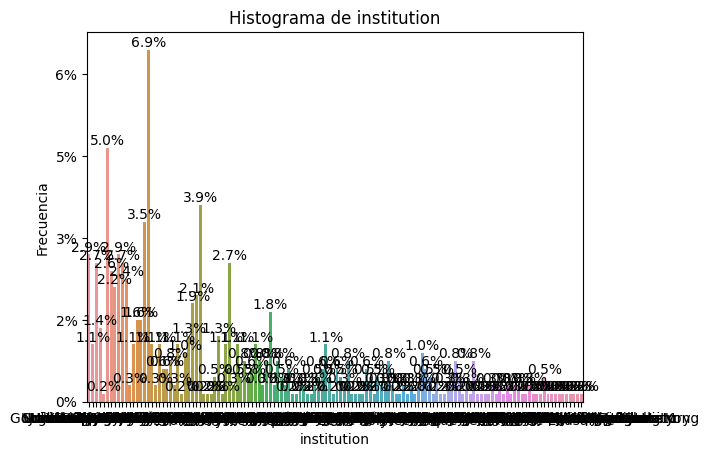

In [150]:
eda.plot_histogram(Coursera_courses, 'institution')

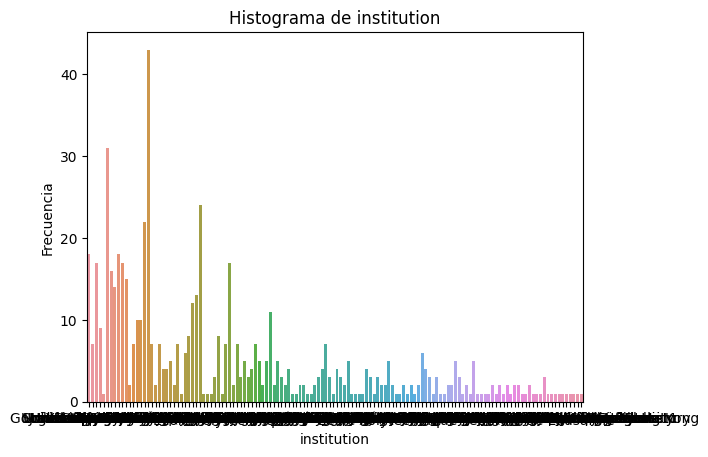

In [151]:
def plot_histogram(dataframe, column):

    """
    Crea un histograma utilizando countplot para una columna dada en un dataframe.

    Args:
        dataframe (pd.DataFrame): El dataframe del que se extraen los datos.
        column (str): El nombre de la columna para el histograma.
    """
    sns.countplot(data=dataframe, x=column)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    
    # Mostrar la imagen en el entorno de ejecución de Jupyter Notebook
    plt.show()

plot_histogram(Coursera_courses,'institution')

<font size="4"><li><left><i>Existen 134 `instituciones` y University of Pennsylvania es el valor más repetido con 43 cursos.  </i></left></font>

In [152]:
# Contamos valor repetidos en 'url_curso'
Coursera_courses['url'].value_counts()

https://www.coursera.org/learn/machine-learning                             1
https://www.coursera.org/learn/english-composition                          1
https://www.coursera.org/learn/wharton-communication-skills                 1
https://www.coursera.org/learn/introduction-trading-machine-learning-gcp    1
https://www.coursera.org/learn/python-programming-introduction              1
                                                                           ..
https://www.coursera.org/learn/solar-energy-basics                          1
https://www.coursera.org/learn/bootstrap-4                                  1
https://www.coursera.org/learn/google-cloud-java-spring                     1
https://www.coursera.org/learn/forensic-science                             1
https://www.coursera.org/learn/data-science-course                          1
Name: url, Length: 623, dtype: int64

<font size="4"><li><left><i>Todos valores únicos para `url`.</i></left></font>

In [153]:
# Contamos valor repetidos en 'id_curso'
Coursera_courses['course_id'].value_counts()

machine-learning                             1
english-composition                          1
wharton-communication-skills                 1
introduction-trading-machine-learning-gcp    1
python-programming-introduction              1
                                            ..
solar-energy-basics                          1
bootstrap-4                                  1
google-cloud-java-spring                     1
forensic-science                             1
data-science-course                          1
Name: course_id, Length: 623, dtype: int64

<font size="4"><li><left><i>Todos valores únicos para `course_id`.</i></left></font>

In [154]:
Coursera_courses.head()

,title,institution,url,course_id,provider
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,coursera
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,coursera
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,coursera
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,coursera
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,coursera


In [155]:
Coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        623 non-null    object
 1   institution  623 non-null    object
 2   url          623 non-null    object
 3   course_id    623 non-null    object
 4   provider     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


<font size="4"><li><left><i>Importamos `Coursera_reviews_agg` desde csv, donde podemos agregar a `Coursera_courses` los valores de `num_reviews`, `rating` promedio y `published_timestamp`: </i></left></font>

In [156]:
#Importamos dataframe a csv
# Definimos path
path_in_csv = '/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/rawDataSets/Coursera_reviews_agg.csv'

Coursera_reviews_agg = eda.read_csv(path_in_csv)

In [157]:
Coursera_reviews_agg.head()

,course_id,rating,reviewers,date_reviews
0,aboriginal-education,4.552239,67,2017-03-22
1,access-control-sscp,4.466667,45,2018-04-19
2,accounting-analytics,4.395299,468,2016-01-05
3,accounting-data-analytics-python,3.500000,8,2020-01-11
4,actualizacion-manejo-diabetes-tipo-2,4.845850,253,2019-02-05


In [158]:
Coursera_courses = Coursera_courses.merge(Coursera_reviews_agg, on='course_id', how='left')

In [159]:
Coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         623 non-null    object 
 1   institution   623 non-null    object 
 2   url           623 non-null    object 
 3   course_id     623 non-null    object 
 4   provider      623 non-null    object 
 5   rating        604 non-null    float64
 6   reviewers     604 non-null    float64
 7   date_reviews  604 non-null    object 
dtypes: float64(2), object(6)
memory usage: 43.8+ KB


<font size="4"><li><left><i>Reodenamos columnas y agregamos nuevas:</i></left></font>

In [160]:
# Reembramos columnas
# Definir un diccionario de mapeo de nombres de columnas
column_mapping = {'reviewers':'num_reviews', 'date_reviews':'published_timestamp'}

# Llamar al método rename_columns
Coursera_courses = eda.rename_columns(Coursera_courses, column_mapping)

In [161]:
Coursera_courses.head()

,title,institution,url,course_id,provider,rating,num_reviews,published_timestamp
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,coursera,4.739923,12677.0,2015-08-07
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,coursera,4.816438,1460.0,2017-04-09
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,coursera,4.929504,8199.0,2018-03-29
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,coursera,4.767482,12055.0,2018-01-16
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,coursera,4.818182,33.0,2019-06-07


In [162]:
# Insertamos nuevas columnas y poblamos lineas
columns = ['subject', 'price', 'level', 'num_subscribers', 'num_lectures', 'content_duration', 'language']
values = ['', '0', '', 0, 0, 0, '']

for i, column in enumerate(columns):
    Coursera_courses.insert(8 + i, column, values[i])


In [163]:
# Reordenar las columnas del dataframe
dataframe_reordenado = Coursera_courses.reindex(columns=['course_id','provider','institution','title','subject','url','price','level','num_subscribers','num_lectures',
       'num_reviews','rating','content_duration','language','published_timestamp'])
dataframe_reordenado.head()

,course_id,provider,institution,title,subject,url,price,level,num_subscribers,num_lectures,num_reviews,rating,content_duration,language,published_timestamp
0,machine-learning,coursera,Stanford University,Machine Learning,,https://www.coursera.org/learn/machine-learning,0,,0,0,12677.0,4.739923,0,,2015-08-07
1,indigenous-canada,coursera,University of Alberta,Indigenous Canada,,https://www.coursera.org/learn/indigenous-canada,0,,0,0,1460.0,4.816438,0,,2017-04-09
2,the-science-of-well-being,coursera,Yale University,The Science of Well-Being,,https://www.coursera.org/learn/the-science-of-...,0,,0,0,8199.0,4.929504,0,,2018-03-29
3,technical-support-fundamentals,coursera,Google,Technical Support Fundamentals,,https://www.coursera.org/learn/technical-suppo...,0,,0,0,12055.0,4.767482,0,,2018-01-16
4,google-cbrs-cpi-training,coursera,Google - Spectrum Sharing,Become a CBRS Certified Professional Installer...,,https://www.coursera.org/learn/google-cbrs-cpi...,0,,0,0,33.0,4.818182,0,,2019-06-07


In [164]:
# Exportamos dataframe a csv
# Definimos path
path_out_csv = '/Users/negro/Library/CloudStorage/OneDrive-Personal/Documentos/00 Fran/01 - Personales/02-Learn/0. Data Science/0. Data Science/2_projects/e_MOOCs/2_Repo/MOOCs_BA/rawDataSets/Coursera_courses_norm.csv'

dataframe_reordenado.to_csv(path_out_csv, index=False, encoding='UTF-8', decimal='.')

<font size="10" color="white"><li><left><i>Acá hay que seguir avanzando en el EDA</i></left></font>